# Extra Credit: Scraping the unscrapable with Selenium

### What is Selenium?

Selenium automates browsers. That's it! What you do with that power is entirely up to you. Primarily, it is for automating web applications for testing purposes, but is certainly not limited to just that. 

Web-scraping tasks can (and should) be automated as well. 


### Working with Selenium

1. http://selenium-python.readthedocs.io/index.html
2. http://seleniumhq.github.io/selenium/docs/api/py/index.html

In [ ]:
## Install Selenium and your browser driver:
# !pip install selenium
# !brew install chromedriver

<tbody valign="top">
<tr><td><strong>Chrome</strong>:</td>
<td><a href="https://sites.google.com/a/chromium.org/chromedriver/downloads">https://sites.google.com/a/chromium.org/chromedriver/downloads</a></td>
</tr>
<tr><td><strong>Edge</strong>:</td>
<td><a href="https://developer.microsoft.com/en-us/microsoft-edge/tools/webdriver/">https://developer.microsoft.com/en-us/microsoft-edge/tools/webdriver/</a></td>
</tr>
<tr><td><strong>Firefox</strong>:</td>
<td><a href="https://github.com/mozilla/geckodriver/releases">https://github.com/mozilla/geckodriver/releases</a></td>
</tr>
<tr><td><strong>Safari</strong>:</td>
<td><a href="https://webkit.org/blog/6900/webdriver-support-in-safari-10/">https://webkit.org/blog/6900/webdriver-support-in-safari-10/</a></td>
</tr>
</tbody>

## What happens if I try to parse my gmail with `requests` and `BeautifulSoup`?

In [63]:
import requests
from bs4 import BeautifulSoup

gmail_url="https://gmail.com"
soup=BeautifulSoup(requests.get(gmail_url).text)
print(soup.prettify())

<!DOCTYPE html>
<html lang="en">
 <head>
  <meta charset="utf-8"/>
  <meta content="width=300, initial-scale=1" name="viewport"/>
  <meta content="Gmail is email that's intuitive, efficient, and useful. 15 GB of storage, less spam, and mobile access." name="description"/>
  <meta content="LrdTUW9psUAMbh4Ia074-BPEVmcpBxF6Gwf0MSgQXZs" name="google-site-verification"/>
  <title>
   Gmail
  </title>
  <style>
   @font-face {
  font-family: 'Open Sans';
  font-style: normal;
  font-weight: 300;
  src: local('Open Sans Light'), local('OpenSans-Light'), url(//fonts.gstatic.com/s/opensans/v13/DXI1ORHCpsQm3Vp6mXoaTYnF5uFdDttMLvmWuJdhhgs.ttf) format('truetype');
}
@font-face {
  font-family: 'Open Sans';
  font-style: normal;
  font-weight: 400;
  src: local('Open Sans'), local('OpenSans'), url(//fonts.gstatic.com/s/opensans/v13/cJZKeOuBrn4kERxqtaUH3aCWcynf_cDxXwCLxiixG1c.ttf) format('truetype');
}
  </style>
  <style>
   h1, h2 {
  -webkit-animation-duration: 0.1s;
  -webkit-animation-name: fon

/Users/lingqiangkong/miniconda2/envs/py3/lib/python3.6/site-packages/bs4/__init__.py:181: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("html5lib"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 193 of the file /Users/lingqiangkong/miniconda2/envs/py3/lib/python3.6/runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup(YOUR_MARKUP})

to this:

 BeautifulSoup(YOUR_MARKUP, "html5lib")

  markup_type=markup_type))


In [64]:
print(soup.find(id='Email'))

<input id="Email" name="Email" placeholder="Email or phone" spellcheck="false" type="email" value=""/>


We have hit the login page. We can't get to the emails without logging in ....

## We can use Selenium to get through the login wall

In [1]:
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.common.by import By
from selenium.webdriver.support import expected_conditions as EC
import os

# Specify where the browser driver is located ---- only do this if not in $PATH already
# chromedriver = "./chromedriver"
# os.environ["webdriver.chrome.driver"] = chromedriver

In [65]:
# Initialize a browser
browser = webdriver.Chrome()
browser.get("https://www.gmail.com")

'<!DOCTYPE html><html xmlns="http://www.w3.org/1999/xhtml" lang="en" dir="ltr" class="CMgTXc"><head><base href="https://accounts.google.com/" /><script data-id="_gd" nonce="IfEKmhA0hReFg7G8ZUBJRNroWjs">window.WIZ_global_data = {"OewCAd":"%.@.\\"xsrf\\",null,[\\"\\"]\\n,\\"AFoagUU1Ql-UlKUtd6ELqd2XXykpRXNsgQ:1499205447550\\"]\\n","nQyAE":{},"thykhd":"APwN6M-4Rfr1I5rkXXyAT4zBpnvIq8BmoV_BS7-ABCBrzftcWwtr_Lff-ikKntwkdRMd2d-MZn-qp0Rpd3j4-q6HEgPEsqGV0K70","w2btAe":"%.@.null,null,\\"\\",false]\\n"};</script><meta charset="utf-8" /><meta http-equiv="X-UA-Compatible" content="IE=edge" /><link rel="shortcut icon" href="//www.google.com/favicon.ico" /><noscript>&lt;meta http-equiv="refresh" content="0; url=https://accounts.google.com/ServiceLogin?continue=https%3A%2F%2Fmail.google.com%2Fmail%2F&amp;amp;rip=1&amp;amp;nojavascript=1&amp;amp;service=mail&amp;amp;rm=false&amp;amp;ltmpl=default&amp;amp;scc=1&amp;amp;ss=1&amp;amp;osid=1&amp;amp;emr=1"&gt;&lt;style nonce="IfEKmhA0hReFg7G8ZUBJRNroWjs"&gt;
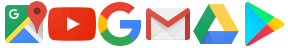
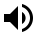
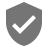
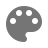
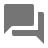
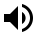

In [42]:
browser.page_source

#### Fill out username and password, hit enter to log in

In [69]:
email = browser.find_element_by_id("Email") # identifierId
email.send_keys("email@host.com")
email.send_keys(Keys.RETURN) 

In [54]:
passwd = browser.find_element_by_name("password")
passwd.send_keys("##########")
passwd.send_keys(Keys.RETURN)

#### Click compose button to start a new email draft!

In [70]:
compose_button=browser.find_element_by_xpath('//div[text()="COMPOSE"]')
compose_button.click()

#### Write a nice, friendly message to your favorite person

In [56]:
to_field = browser.find_element_by_name("to")
to_field.send_keys("ling@thisismetis.com")

In [59]:
subject = browser.find_element_by_name("subjectbox")
subject.send_keys("Hello from PyData!")

In [58]:
message_body = browser.find_element_by_xpath("//div[@aria-label='Message Body']")
message_body.send_keys("Hello,")
message_body.send_keys(Keys.RETURN)
message_body.send_keys("I am a computer and I just became self aware.")

#### Press the send button

In [61]:
send_button = browser.find_element_by_xpath("//div[contains(@aria-label, 'Send')]")
send_button.click()

## WebElement Attributes and Methods
<table summary="Selenium’s WebDriver Methods for Finding Elements" class="calibre9">
<colgroup class="calibre10">
<col class="calibre11">
<col class="calibre11">
</colgroup>
<thead class="calibre12">
<tr class="calibre13">
<th valign="top" class="calibre14">
<p class="calibre4"><a id="calibre_link-305" class="calibre1"></a><a id="calibre_link-323" class="calibre1"></a><a id="calibre_link-385" class="calibre1"></a><a id="calibre_link-735" class="calibre1"></a><a id="calibre_link-902" class="calibre1"></a><a id="calibre_link-903" class="calibre1"></a><a id="calibre_link-906" class="calibre1"></a><a id="calibre_link-1016" class="calibre1"></a><a id="calibre_link-1551" class="calibre1"></a><a id="calibre_link-1693" class="calibre1"></a>Method name</p>
</th>
<th valign="top" class="calibre15">
<p class="calibre4">WebElement object/list returned</p>
</th>
</tr>
</thead>
<tbody class="calibre16">
<tr class="calibre13">
<td valign="top" class="calibre17"><a id="calibre_link-2988" class="calibre1"></a>
<pre class="programlisting2">browser.find_element_by_class_name(<span class="calibre1"><em class="literal3">name</em></span>)
browser.find_elements_by_class_name(<span class="calibre1"><em class="literal3">name</em></span>)</pre>
</td>
<td valign="top" class="calibre18">
<p class="calibre4">Elements that use the CSS class <span class="calibre1"><em class="calibre5"><code class="literal4">name</code></em></span></p>
</td>
</tr>
<tr class="calibre19">
<td valign="top" class="calibre17"><a id="calibre_link-2989" class="calibre1"></a>
<pre class="programlisting2">browser.find_element_by_css_selector(<span class="calibre1"><em class="literal3">selector</em></span>)
browser.find_elements_by_css_selector(<span class="calibre1"><em class="literal3">selector</em></span>)</pre>
</td>
<td valign="top" class="calibre18">
<p class="calibre4">Elements that match the CSS <span class="calibre1"><em class="calibre5"><code class="literal4">selector</code></em></span></p>
</td>
</tr>
<tr class="calibre13">
<td valign="top" class="calibre17"><a id="calibre_link-2990" class="calibre1"></a>
<pre class="programlisting2">browser.find_element_by_id(<span class="calibre1"><em class="literal3">id</em></span>)
browser.find_elements_by_id(<span class="calibre1"><em class="literal3">id</em></span>)</pre>
</td>
<td valign="top" class="calibre18">
<p class="calibre4">Elements with a matching <span class="calibre1"><em class="calibre5"><code class="literal4">id</code></em></span> attribute value</p>
</td>
</tr>
<tr class="calibre19">
<td valign="top" class="calibre17"><a id="calibre_link-2991" class="calibre1"></a>
<pre class="programlisting2">browser.find_element_by_link_text(<span class="calibre1"><em class="literal3">text</em></span>)
browser.find_elements_by_link_text(<span class="calibre1"><em class="literal3">text</em></span>)</pre>
</td>
<td valign="top" class="calibre18">
<p class="calibre4"><code class="literal2">&lt;a&gt;</code> elements that completely match the <span class="calibre1"><em class="calibre5"><code class="literal4">text</code></em></span> provided</p>
</td>
</tr>
<tr class="calibre13">
<td valign="top" class="calibre17"><a id="calibre_link-2992" class="calibre1"></a>
<pre class="programlisting2">browser.find_element_by_partial_link_text(<span class="calibre1"><em class="literal3">text</em></span>)
browser.find_elements_by_partial_link_text(<span class="calibre1"><em class="literal3">text</em></span>)</pre>
</td>
<td valign="top" class="calibre18">
<p class="calibre4"><code class="literal2">&lt;a&gt;</code> elements that contain the <span class="calibre1"><em class="calibre5"><code class="literal4">text</code></em></span> provided</p>
</td>
</tr>
<tr class="calibre19">
<td valign="top" class="calibre17"><a id="calibre_link-2993" class="calibre1"></a>
<pre class="programlisting2">browser.find_element_by_name(<span class="calibre1"><em class="literal3">name</em></span>)
browser.find_elements_by_name(<span class="calibre1"><em class="literal3">name</em></span>)</pre>
</td>
<td valign="top" class="calibre18">
<p class="calibre4">Elements with a matching <span class="calibre1"><em class="calibre5"><code class="literal4">name</code></em></span> attribute value</p>
</td>
</tr>
<tr class="calibre13">
<td valign="top" class="calibre20"><a id="calibre_link-2994" class="calibre1"></a>
<pre class="programlisting2">browser.find_element_by_tag_name(<span class="calibre1"><em class="literal3">name</em></span>)
browser.find_elements_by_tag_name(<span class="calibre1"><em class="literal3">name</em></span>)</pre>
</td>
<td valign="top" class="calibre21">
<p class="calibre4">Elements with a matching tag <span class="calibre1"><em class="calibre5"><code class="literal4">name</code></em></span> (case insensitive; an <code class="literal2">&lt;a&gt;</code> element is matched by <code class="literal2">'a'</code> and <code class="literal2">'A'</code>)</p>
</td>
</tr>
</tbody>
</table>

In [62]:
browser.close()

## Scraping IMDB with selenium

Let's scrape IMDB to get some movie reviews. While we are there, also get the budget if the budget is missing from our boxofficemojo scrape

In [144]:
browser = webdriver.Chrome()

In [148]:
url = "http://www.imdb.com"
browser.get(url)

In [109]:
query = browser.find_element_by_id("navbar-query")
query.send_keys("sound of music ")

In [110]:
query.send_keys(Keys.ARROW_DOWN)
query.send_keys(Keys.RETURN)

In [111]:
budget = browser.find_element_by_xpath('//*[@id="titleDetails"]/div[7]').text
print(budget)

Budget: $55,000,000 (estimated)


In [112]:
metascore = browser.find_element_by_xpath('//*[@id="title-overview-widget"]/div[3]/div[2]/div[2]/div[1]/a/div/span').text
print(metascore)

86


In [113]:
imdbscore = browser.find_element_by_xpath('//*[@id="title-overview-widget"]/div[2]/div[2]/div/div[1]/div[1]/div[1]/strong/span').text
print(imdbscore)

7.3


## Commonly Used Variables in the selenium.webdriver.common.keys Module
<table summary="Commonly Used Variables in the selenium.webdriver.common.keys Module" class="calibre9">
<colgroup class="calibre10">
<col class="calibre11">
<col class="calibre11">
</colgroup>
<thead class="calibre12">
<tr class="calibre13">
<th valign="top" class="calibre14">
<p class="calibre4">Attributes</p>
</th>
<th valign="top" class="calibre15">
<p class="calibre4">Meanings</p>
</th>
</tr>
</thead>
<tbody class="calibre16">
<tr class="calibre13">
<td valign="top" class="calibre17">
<p class="calibre4"><code class="literal2">Keys.DOWN</code>, <code class="literal2">Keys.UP</code>, <code class="literal2">Keys.LEFT</code>, <code class="literal2">Keys.RIGHT</code></p>
</td>
<td valign="top" class="calibre18">
<p class="calibre4">The keyboard arrow keys</p>
</td>
</tr>
<tr class="calibre19">
<td valign="top" class="calibre17">
<p class="calibre4"><code class="literal2">Keys.ENTER</code>, <code class="literal2">Keys.RETURN</code></p>
</td>
<td valign="top" class="calibre18">
<p class="calibre4">The <span class="smaller">ENTER</span> and <span class="smaller">RETURN</span> keys</p>
</td>
</tr>
<tr class="calibre13">
<td valign="top" class="calibre17">
<p class="calibre4"><code class="literal2">Keys.HOME</code>, <code class="literal2">Keys.END</code>, <code class="literal2">Keys.PAGE_DOWN</code>, <code class="literal2">Keys.PAGE_UP</code></p>
</td>
<td valign="top" class="calibre18">
<p class="calibre4">The <code class="literal2">home</code>, <code class="literal2">end</code>, <code class="literal2">pagedown</code>, and <code class="literal2">pageup</code> keys</p>
</td>
</tr>
<tr class="calibre19">
<td valign="top" class="calibre17">
<p class="calibre4"><code class="literal2">Keys.ESCAPE</code>, <code class="literal2">Keys.BACK_SPACE</code>, <code class="literal2">Keys.DELETE</code></p>
</td>
<td valign="top" class="calibre18">
<p class="calibre4">The <span class="smaller">ESC</span>, <span class="smaller">BACKSPACE</span>, and <span class="smaller">DELETE</span> keys</p>
</td>
</tr>
<tr class="calibre13">
<td valign="top" class="calibre17">
<p class="calibre4"><code class="literal2">Keys.F1</code>, <code class="literal2">Keys.F2</code>,..., <code class="literal2">Keys.F12</code></p>
</td>
<td valign="top" class="calibre18">
<p class="calibre4">The F1 to F12 keys at the top of the keyboard</p>
</td>
</tr>
<tr class="calibre19">
<td valign="top" class="calibre20">
<p class="calibre4"><code class="literal2">Keys.TAB</code></p>
</td>
<td valign="top" class="calibre21">
<p class="calibre4">The <span class="smaller">TAB</span> key</p>
</td>
</tr>
</tbody>
</table>

In [71]:
# import pandas as pd
# df = pd.read_csv('../data/alltime_movies200_clean.csv')

# df['release date'] = pd.to_datetime(df['release date'])
# titles = df['movie title']
# years = df['release date'].map(lambda x: x.year)  

In [164]:
# Scraping all 200 movies with Selenium

# browser = webdriver.Chrome()
# url = "http://www.google.com"
# movie_data = []

# for title, year in zip(titles, years):
#     query_term = title + ' ' + str(year) 
    
#     browser.get(url)

#     query = browser.find_element_by_id("lst-ib")
#     query.send_keys(query_term)
#     query.send_keys(" ")
#     query.send_keys("imdb")
#     query.send_keys(Keys.RETURN)
    
    
#     try:
#         element = WebDriverWait(browser, 10).until(
#             EC.presence_of_element_located((By.XPATH, '//a[contains(text(), "IMDb")]'))
#         )
#     finally:
#         element.click() 
    
#     budget, metascore, imdbscore = None, None, None
    
#     try:
#         budget = browser.find_element_by_xpath('//*[@id="titleDetails"]/div[7]').text
#     except:
#         pass
    
#     try:
#         metascore = browser.find_element_by_class_name('metacriticScore').text
#     except:
#         pass
    
#     try:
#         imdbscore = browser.find_element_by_class_name('ratingValue').text.split('/')[0]
#     except:
#         pass
    
#     movie_dict = {"title": title,
#                   "budget": budget.split()[1],
#                   "metascore": metascore,
#                   "imdbscore": imdbscore
#                  }

#     movie_data.append(movie_dict)
# browser.close()

In [165]:
len(movie_data)

200

In [167]:
df_imdb = pd.DataFrame(movie_data)

In [169]:
df_merged = pd.merge(df, df_imdb, left_on = 'movie title', right_on = 'title')

### Turns out some movies' budgets were missing on imdb as well. I have to check the movie wikipedia page to fill in the answers.
But we'll skip this part for now. Let's just load it from my pre-saved csv file.

In [4]:
import pandas as pd
df_merged = pd.read_csv('../data/alltime_movies200_merged.csv')

## Let's see if we can build a linear regression model to predict movie gross

In [34]:
# need to install sklearn if not already
#!conda install scikit-learn -y

Fetching package metadata .........
Solving package specifications: .

Package plan for installation in environment /Users/lingqiangkong/miniconda2/envs/py3:

The following NEW packages will be INSTALLED:

    scikit-learn: 0.18.2-np113py36_0

scikit-learn-0 100% |################################| Time: 0:00:12 412.99 kB/s       | ETA:  0:00:04 409.29 kB/s


In [18]:
df_merged['month'] = pd.to_datetime(df_merged['release date']).map(lambda x: x.month)
df_merged['year'] = pd.to_datetime(df_merged['release date']).map(lambda x: x.year)

In [49]:
selected_columns = ['actual_dtg', 'domestic total gross', 'rating', 'runtime (mins)', 'imdbscore', 'budget', 'month','year']

In [50]:
df = df_merged[selected_columns]

In [51]:
df.head()

,actual_dtg,domestic total gross,rating,runtime (mins),imdbscore,budget,month,year
0,198676459,1768000000,G,238,8.2,3977000.0,12,1939
1,460998007,1261768700,PG,121,8.7,11000000.0,5,1977
2,158671368,1258951900,G,174,8.0,8200000.0,3,1965
3,435110554,1099155300,PG,117,7.9,10500000.0,6,1982
4,658672302,1134577600,PG-13,194,7.7,200000000.0,12,1997


In [52]:
y = df['actual_dtg']
X = df.iloc[:,2:]
X['month'] = X.month.astype("category")

In [53]:
X = pd.get_dummies(X)

In [54]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [55]:
clf = LinearRegression()

In [56]:
scores = cross_val_score(clf, X, y,cv=5, scoring = 'neg_mean_absolute_error')

In [57]:
scores

array([ -1.32222211e+08,  -4.72511271e+07,  -4.46140751e+07,
        -6.20925901e+07,  -8.47653478e+07])

In [ ]:
# Like we expected, these are very limited information and does not make a good model. 
# We have to collect even more data